# Analisis de grupos.

## Requerimiento:

### Descripción

Análisis comparativo de los datos por sexo
- Prueba t de diferencia de medias de dos grupos (de la misma población), a dos colas.
- Claves de interpretación
- Gráficos curvas de los dos grupos por variables

### Entregable 

- Sección de resultados (APA, 6a)
- Gráficos de curvas
- Tabla de puntajes
- Claves de interpretación
- Señalar las diferencias estadísticamente significativas.

In [1]:
cuestionario=read.csv2(file="SOLO IVIC.csv", header = T)
carga=nrow(cuestionario)
print(c("sin reincidencia",sum(cuestionario$REINCIDENCIARECO==0)))
print(c("con reincidencia",sum(!cuestionario$REINCIDENCIARECO==0)))
print(c("tamaño inicial",nrow(cuestionario)))
row.names(cuestionario)=cuestionario$INTERNO
cuestionario=cuestionario[cuestionario$REINCIDENCIARECO==1
                          &cuestionario$EDAD_INGRESO>17
                          &cuestionario$EDAD_INGRESO<76 
                          ,-1]

print (c("cuestionario filtrado",nrow(cuestionario)))
filtrado=nrow(cuestionario)
print(c("diferencia", carga-filtrado))

[1] "sin reincidencia" "16292"           
[1] "con reincidencia" "11652"           
[1] "tamaño inicial" "27944"         
[1] "cuestionario filtrado" "11641"                
[1] "diferencia" "16303"     


In [2]:
cuestionario$Durantesuinfanciafuemaltratado=factor(cuestionario$Durantesuinfanciafuemaltratado,
                                                  labels=c("No reporta","Físico","Psico.","Sexual","Varios")
                                                  )

cuestionario$Ustedhaconsumidoalmenosunavezensuvidasustanciaspsicoactivasodrog=factor(cuestionario$Ustedhaconsumidoalmenosunavezensuvidasustanciaspsicoactivasodrog,
                                                                                    labels=c("No","Si")
                                                                                    )

cuestionario$Cualdeestasdrogasconsumeohaconsumido=factor(cuestionario$Cualdeestasdrogasconsumeohaconsumido,
                                                        labels=c("Ninguna","Anfetam.","Bazuco","Cocaína","Heroína","Inhalantes","Marihuana","Sedantes","2 SPA","3 o más")
                                                        )
cuestionario$Ustedhaestadoentratamientopsiquiatrico=factor(cuestionario$Ustedhaestadoentratamientopsiquiatrico,
       labels=c("No","Si")
       )

cuestionario$Suultimogradoescolaraprobadoseencuentraentre=factor(cuestionario$Suultimogradoescolaraprobadoseencuentraentre,
       labels=c("Analfabeta","1-3","4-5","6-7","8-9","10","11","Ed.Sup")
       )

cuestionario$Enlaactualidadustedconsumeotomasustanciaspsicoactivasodrogasaluc=factor(cuestionario$Enlaactualidadustedconsumeotomasustanciaspsicoactivasodrogasaluc,
       labels=c("No","Si")
       )


In [3]:
table(cuestionario$Durantesuinfanciafuemaltratado)
table(cuestionario$Ustedhaconsumidoalmenosunavezensuvidasustanciaspsicoactivasodrog)
table(cuestionario$Cualdeestasdrogasconsumeohaconsumido)
table(cuestionario$Ustedhaestadoentratamientopsiquiatrico)
table(cuestionario$Suultimogradoescolaraprobadoseencuentraentre)
table(cuestionario$Enlaactualidadustedconsumeotomasustanciaspsicoactivasodrogasaluc)


No reporta     Físico     Psico.     Sexual     Varios 
      7663       2537        715         92        634 


  No   Si 
4368 7185 


   Ninguna   Anfetam.     Bazuco    Cocaína    Heroína Inhalantes  Marihuana 
      4816        115        189        263         12         21       3994 
  Sedantes      2 SPA    3 o más 
        22       1024       1115 


   No    Si 
10534  1004 


Analfabeta        1-3        4-5        6-7        8-9         10         11 
       438       1811       2428       2219       1855        574       1680 
    Ed.Sup 
       611 


  No   Si 
9198 2354 

In [4]:
SEXO=factor(cuestionario[,"SEXO"], labels=c("Hombre","Mujer"))
var_crit=cuestionario[,!colnames(cuestionario)=="SEXO"]
chisq_test_var=c("REINCIDENCIARECO","X.103","X.111","X.168","X.169","X.205","X.208","X.209","X.229","X.233","X.244","X.246","X.289","X.295","X.329","X.365","X.376","X.382","X.435","X.447","X.467","X.9999","Durantesuinfanciafuemaltratado","Ustedhaconsumidoalmenosunavezensuvidasustanciaspsicoactivasodrog","Cualdeestasdrogasconsumeohaconsumido","Ustedhaestadoentratamientopsiquiatrico","Suultimogradoescolaraprobadoseencuentraentre","Enlaactualidadustedconsumeotomasustanciaspsicoactivasodrogasaluc")
t_test_var=c("OTROS_INGRE","N_INGRESOS","REINCIDENCIA","EDAD_INGRESO")
chisq_test=var_crit[,colnames(var_crit)%in%chisq_test_var]
t_test=var_crit[,colnames(var_crit)%in%t_test_var]
head(var_crit)

,OTROS_INGRE,N_INGRESOS,REINCIDENCIA,REINCIDENCIARECO,N_HIJOS,ESTADO_CIVIL,REALIZO_ACTIVIDAD,CALIFICACION,SANCIONES,EDAD_INGRESO,...,Enqueespaciosdelestablecimientopermaneceustedconmasfrecuencia,Parahablarconsusfamiliaresyamigosustedutilizapalabrasaprendidase,Actualmenteustedsabequehacerconsuvida,Lasalternativasqueustedhaelegidopararesolverproblemaslehanpermit,eltiempoquehaestadoenelestablecimientolehaservidoprincipalmentep,Duranteestacondenaustedhasolicitadomedidasdeproteccionespecialal,Ustedtieneunaenfermedadgrave,Ustedseconsideraunapersonaquecuidaelmedioambiente,Cuandoustedtomaunadecision,Austedlesirvepagarestacondenapara
22,2,4,1,1,NA,1,1,0,1,24,...,1,1,2,2,3,1,1,3,3,3
55,0,3,2,1,3,0,1,3,0,37,...,1,1,1,3,3,1,1,3,3,2
309,0,2,1,1,2,5,1,4,0,48,...,1,1,NA,3,3,1,1,2,3,2
512,0,2,1,1,NA,5,1,4,0,28,...,1,1,2,3,3,1,1,2,3,3
544,0,2,1,1,NA,0,1,3,0,28,...,1,1,2,2,3,1,1,3,3,2
805,0,2,1,1,NA,0,1,0,0,32,...,1,1,2,2,3,1,1,2,3,2


In [5]:
chisq_test_pltitl=c(
"Reincidencia",
"Homicidio",
"Lesiones Personales",
"Secuestro Simple",
"Secuestro Extorsivo",
"Acceso Carnal Violento",
"Acceso Carnal Abusivo con Menor de 14 Años",
"Actos Sexuales con Menor de 14 Años",
"Violencia intrafamiliar",
"Inasistencia Alimentaria",
"Extorsión",
"Estafa",
"Falsedad en Documento Privado",
"Falsedad para Obtener Prueba de Hecho Verdadero",
"Violación de Fronteras para la Explotación de Recursos Naturales",
"Fabricación, Tráfico y Porte de Armas de Fuego o Municiones",
"Tráfico, Fabricación o Porte de Estupefacientes",
"Tráfico de Sustancias para Procesamiento de Narcóticos",
"Falsa Denuncia",
"Receptación",
"Rebelión",
"Otros Delitos",
"Tipos de Maltrato Durante la Infancia",
"Prevalencia de Consumo Alguna Vez en la Vida",
"SPA Consumida por lo Menos en una Ocasión",
"Tratamiento Psiquiátrico",
"Último Grado Escolar Aprobado",
"Consumo Actual de SPA"
    )


In [6]:
prueba_t=NULL
for(i in 1: length(colnames(t_test))){
    varname=colnames(t_test)[i]
    var=t_test[,i]
    
    jpeg(filename=paste(varname,"-Sexo.jpg"),width = 600, height = 600,quality = 95)
    boxplot(var~SEXO, col="gray75",xlab="Sexo", ylab=varname, main=paste(varname,"- Sexo"))
    dev.off()
    
    test_var_sex=t.test(var~SEXO,var.equal=T)
    valor_t=round(test_var_sex$statistic["t"],2)
    valor_p=round(test_var_sex$p.value,2)
    decis=NULL
    if (valor_p<0.05){decis="Si existen diferencias"}else{decis="No existen diferencias"}
    prueba_t=rbind(prueba_t,c(varname,valor_t,valor_p,decis))
    colnames(prueba_t)=c("Variable", "Valor_t", "Valor_p", "Decisión")
    
    
}
write.csv2(prueba_t, file="resultados prueba t.csv")

In [7]:
prueba_x=NULL
for(i in 1: length(colnames(chisq_test))){
    varname=colnames(chisq_test)[i]
    var=chisq_test[,i]
    data_prop=table(var,SEXO)
    
    jpeg(filename=paste(varname,"-Sexo.jpg"),width = 600, height = 600,quality = 95)
    barplot(t(data_prop), main=chisq_test_pltitl[i], beside=T,las=2)
    legend("topright", legend = c("Hombre", "Mujer"), fill = c("gray15", "gray85"))
    #plot(SEXO,factor(var),xlab="Sexo", ylab=varname, main=paste(varname,"- Sexo"))
    dev.off()
    
    test_var_sex=prop.test(data_prop)
    valor_x=round(test_var_sex$statistic,2)
    valor_p=round(test_var_sex$p.value,2)
    decis=NULL
    if (valor_p<0.05){decis="Si existen diferencias"}else{decis="No existen diferencias"}
    prueba_x=rbind(prueba_x,c(varname,valor_x,valor_p,decis))
    colnames(prueba_x)=c("Variable", "Valor_chi", "Valor_p", "Decisión")
}
write.csv2(prueba_x, file="resultados prueba chi.csv")

Warning message:
In prop.test(data_prop): Chi-squared approximation may be incorrectWarning message:
In prop.test(data_prop): Chi-squared approximation may be incorrectWarning message:
In prop.test(data_prop): Chi-squared approximation may be incorrectWarning message:
In prop.test(data_prop): Chi-squared approximation may be incorrect

In [8]:
prueba_t
prueba_x


Variable,Valor_t,Valor_p,Decisión
OTROS_INGRE,1.51,0.13,No existen diferencias
N_INGRESOS,-4.8,0,Si existen diferencias
REINCIDENCIA,-7.61,0,Si existen diferencias
EDAD_INGRESO,-12.08,0,Si existen diferencias


Variable,Valor_chi,Valor_p,Decisión
REINCIDENCIARECO,8240.05,0,Si existen diferencias
X.103,70.4,0,Si existen diferencias
X.111,38.73,0,Si existen diferencias
X.168,16.19,0,Si existen diferencias
X.169,0.11,0.74,No existen diferencias
X.205,14.48,0,Si existen diferencias
X.208,7.89,0,Si existen diferencias
X.209,10.86,0,Si existen diferencias
X.229,7.57,0.01,Si existen diferencias
X.233,10.78,0,Si existen diferencias


In [9]:
Descriptivos=NULL
#Descriptivos=rbind(Descriptivos,apply(t_test, 2, range))

Descriptivos=rbind(Descriptivos,apply(t_test, 2, mean))
Descriptivos=rbind(Descriptivos,apply(t_test[SEXO=="Hombre",], 2, mean))
Descriptivos=rbind(Descriptivos,apply(t_test[SEXO=="Mujer",], 2, mean))

Descriptivos=rbind(Descriptivos,apply(t_test, 2, sd))
Descriptivos=rbind(Descriptivos,apply(t_test[SEXO=="Hombre",], 2, sd))
Descriptivos=rbind(Descriptivos,apply(t_test[SEXO=="Mujer",], 2, sd))

rownames(Descriptivos)=c("Media","Media Hombre","Media Mujer","Desviación estándar","Desviación estándar Hombre","Desviación estándar Mujer")
#t(t_test)
#Descriptivos=rbind(Descriptivos,t(t_test))
tabl_res=cbind(round(t(Descriptivos),2),prueba_t[,2:4])
tabl_res
write.csv2(tabl_res,file="Estadisticos descriptivos.csv")

,Media,Media Hombre,Media Mujer,Desviación estándar,Desviación estándar Hombre,Desviación estándar Mujer,Valor_t,Valor_p,Decisión
OTROS_INGRE,0.28,0.28,0.23,0.9,0.92,0.56,1.51,0.13,No existen diferencias
N_INGRESOS,2.97,2.95,3.22,1.61,1.59,1.77,-4.8,0,Si existen diferencias
REINCIDENCIA,1.7,1.67,1.98,1.19,1.15,1.58,-7.61,0,Si existen diferencias
EDAD_INGRESO,29.21,28.92,32.62,8.99,8.84,9.92,-12.08,0,Si existen diferencias


In [10]:
table(SEXO)

SEXO
Hombre  Mujer 
 10718    923 

In [11]:
for(i in 1:ncol(t_test)){
    hombres=t_test[SEXO=="Hombre",i]
    mujeres=t_test[SEXO=="Mujer",i]
    dens_h=density(hombres)#,bw=sd(hombres))
    dens_m=density(mujeres)#,bw=sd(mujeres))
    
    jpeg(filename=paste("Distribuciones de",colnames(t_test)[i],"por Sexo.jpg"),width = 600, height = 600,quality = 95)
    plot(0,0,col="white",xlim=c(min(c(dens_h$x,dens_m$x)),max(c(dens_h$x,dens_m$x))),
         ylim=c(min(c(dens_h$y,dens_m$y)),max(c(dens_h$y,dens_m$y))),
         main=paste("Distribuciones de",colnames(t_test)[i],"por Sexo"),
         xlab=colnames(t_test)[i],
         ylab="Densidad"
        )
    lines(dens_h,lty=2)
    lines(dens_m,lty=1)

    r_x=max(dens_h$x,dens_m$x)-min(c(dens_h$x,dens_m$x))
    r_y=max(dens_h$y,dens_m$y)-min(c(dens_h$y,dens_m$y))

    legend(min(c(dens_h$x,dens_m$x))+(r_x*.7),min(c(dens_h$y,dens_m$y))+(r_y*.95),c("Hombres", "Mujeres"),lty=c(2,1))
    dev.off()
}

In [12]:
max(c(dens_h$x,dens_m$x))
min(c(dens_h$x,dens_m$x))

max(c(dens_h$y,dens_m$y))
min(c(dens_h$y,dens_m$y))

[1] 77.14946

[1] 11.16573

[1] 0.06221136

[1] 1.219637e-06

In [13]:
cbind(t(Descriptivos),(prueba_t[,2:4]))


,Media,Media Hombre,Media Mujer,Desviación estándar,Desviación estándar Hombre,Desviación estándar Mujer,Valor_t,Valor_p,Decisión
OTROS_INGRE,0.275835409329095,0.279529763015488,0.232936078006501,0.901377930501335,0.924737470216288,0.561720651453758,1.51,0.13,No existen diferencias
N_INGRESOS,2.97354179194227,2.95260309759283,3.21668472372698,1.60657612476549,1.58983199475241,1.7724889222979,-4.8,0,Si existen diferencias
REINCIDENCIA,1.69770638261318,1.67307333457735,1.98374864572048,1.19302197796112,1.15029273060705,1.58105521947669,-7.61,0,Si existen diferencias
EDAD_INGRESO,29.2129542135555,28.9193879455122,32.6218851570964,8.98936507255164,8.84425256915686,9.91673785666518,-12.08,0,Si existen diferencias


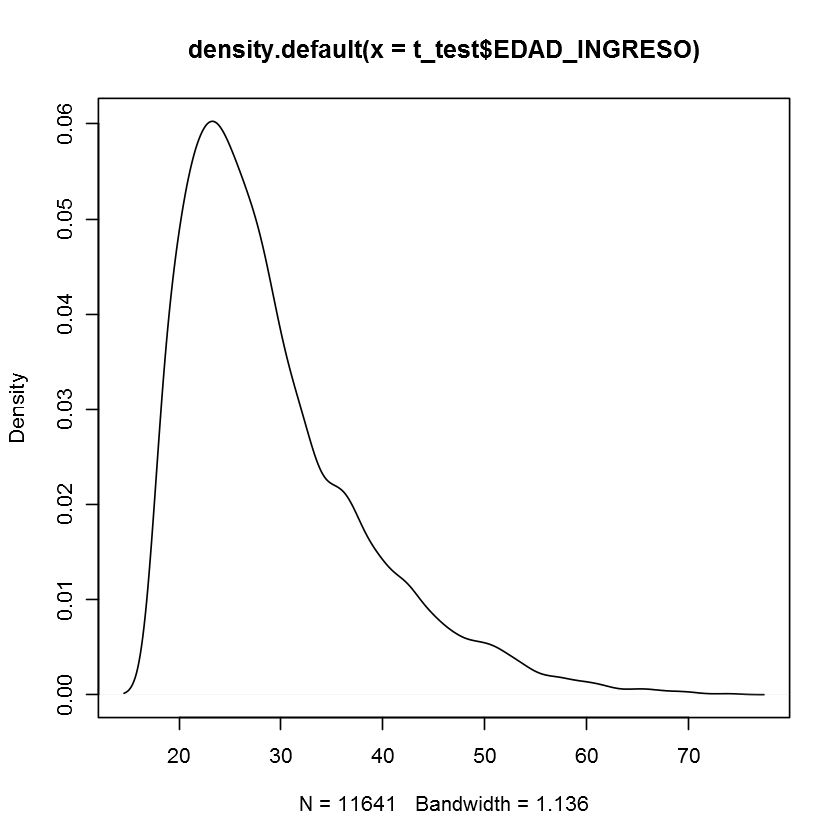

In [14]:
plot(density(t_test$EDAD_INGRESO))

In [27]:
sex_consm=table(SEXO,chisq_test$Cualdeestasdrogasconsumeohaconsumido)
sex_consm[,2:ncol(sex_consm)]

jpeg(filename=paste(chisq_test_pltitl[25],"-Sexo.jpg"),width = 600, height = 600,quality = 95)
barplot(sex_consm[,2:ncol(sex_consm)], main=chisq_test_pltitl[25], beside=T,las=2)
    legend("topright", legend = c("Hombre", "Mujer"), fill = c("gray15", "gray85"))
dev.off()


        
SEXO     Anfetam. Bazuco Cocaína Heroína Inhalantes Marihuana Sedantes 2 SPA
  Hombre      108    164     248      10         19      3815       21   955
  Mujer         7     25      15       2          2       179        1    69
        
SEXO     3 o más
  Hombre    1050
  Mujer       65

png 
  2

[1] "Durantesuinfanciafuemaltratado"
            SEXO
var          Hombre Mujer
  No reporta   7114   549
  Físico       2380   157
  Psico.        668    47
  Sexual         53    39
  Varios        503   131
[1] "Ustedhaconsumidoalmenosunavezensuvidasustanciaspsicoactivasodrog"
    SEXO
var  Hombre Mujer
  No   3843   525
  Si   6794   391


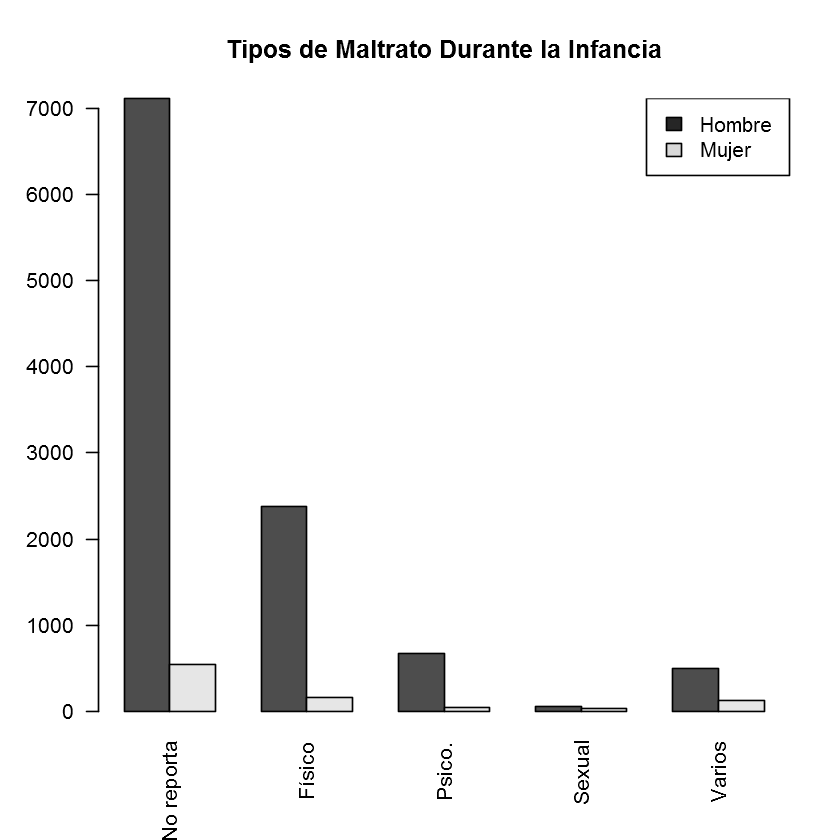

[1] "Cualdeestasdrogasconsumeohaconsumido"
            SEXO
var          Hombre Mujer
  Ninguna      4263   553
  Anfetam.      108     7
  Bazuco        164    25
  Cocaína       248    15
  Heroína        10     2
  Inhalantes     19     2
  Marihuana    3815   179
  Sedantes       21     1
  2 SPA         955    69
  3 o más      1050    65


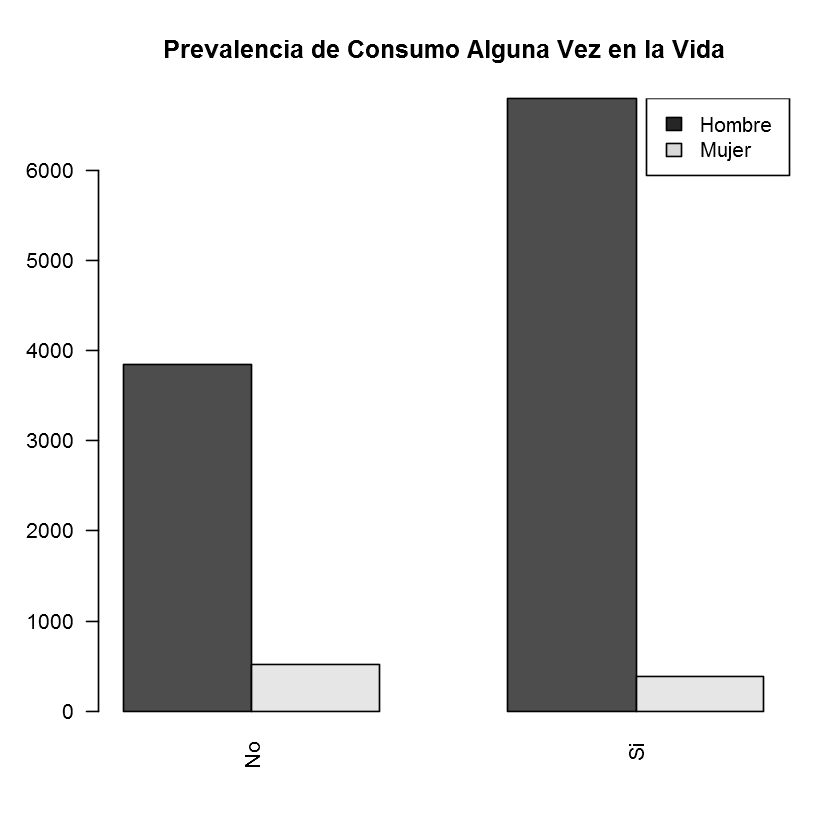

[1] "Ustedhaestadoentratamientopsiquiatrico"
    SEXO
var  Hombre Mujer
  No   9698   836
  Si    922    82


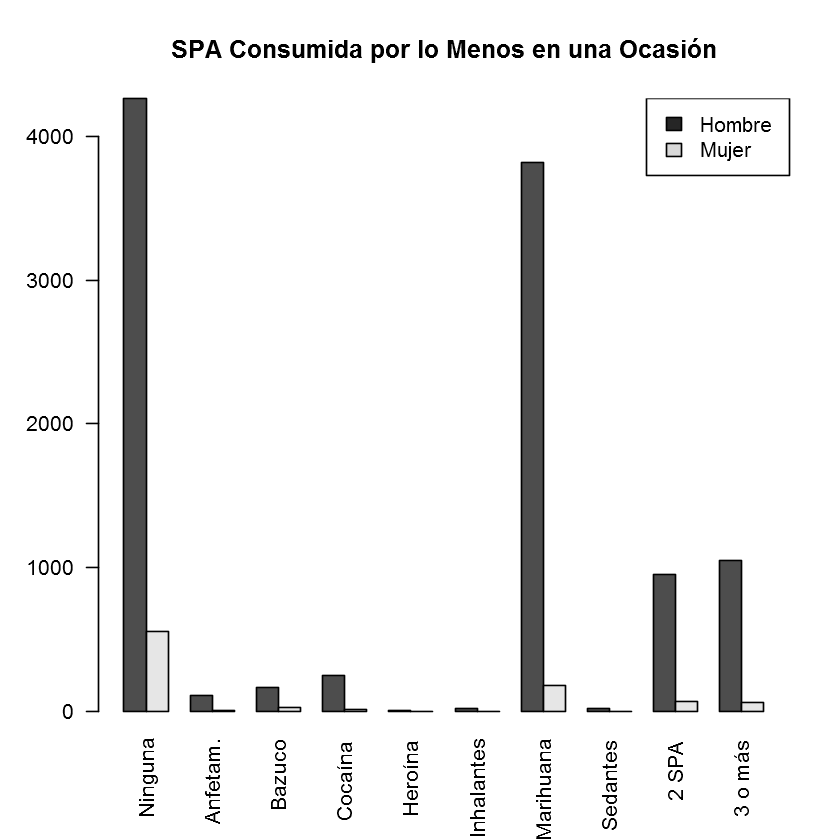

[1] "Suultimogradoescolaraprobadoseencuentraentre"
            SEXO
var          Hombre Mujer
  Analfabeta    384    54
  1-3          1625   186
  4-5          2231   197
  6-7          2055   164
  8-9          1709   146
  10            546    28
  11           1580   100
  Ed.Sup        566    45


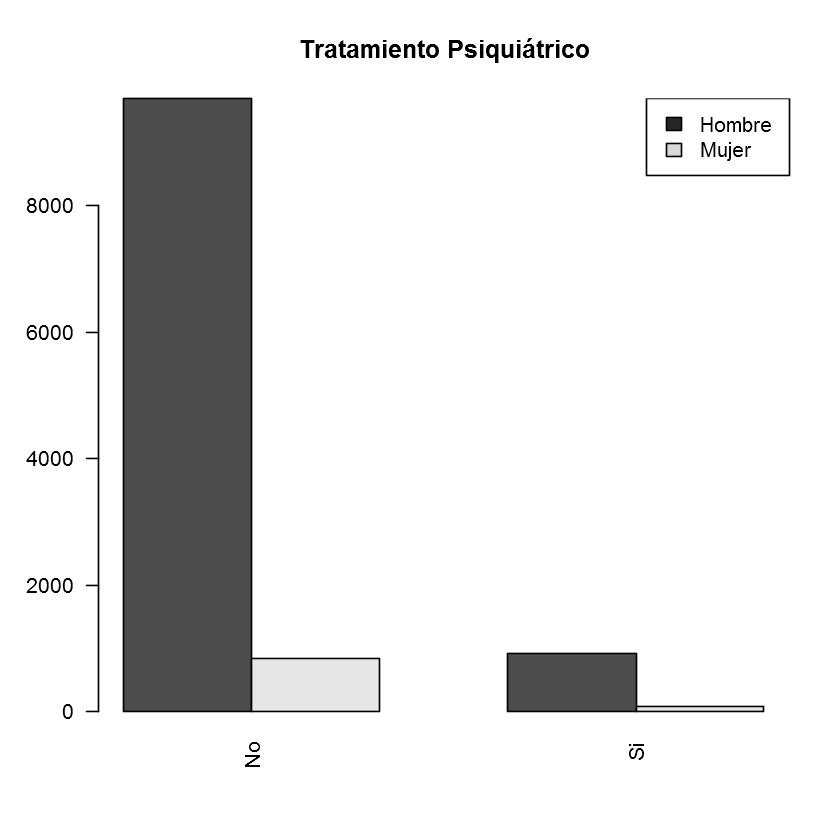

[1] "Enlaactualidadustedconsumeotomasustanciaspsicoactivasodrogasaluc"
    SEXO
var  Hombre Mujer
  No   8348   850
  Si   2290    64


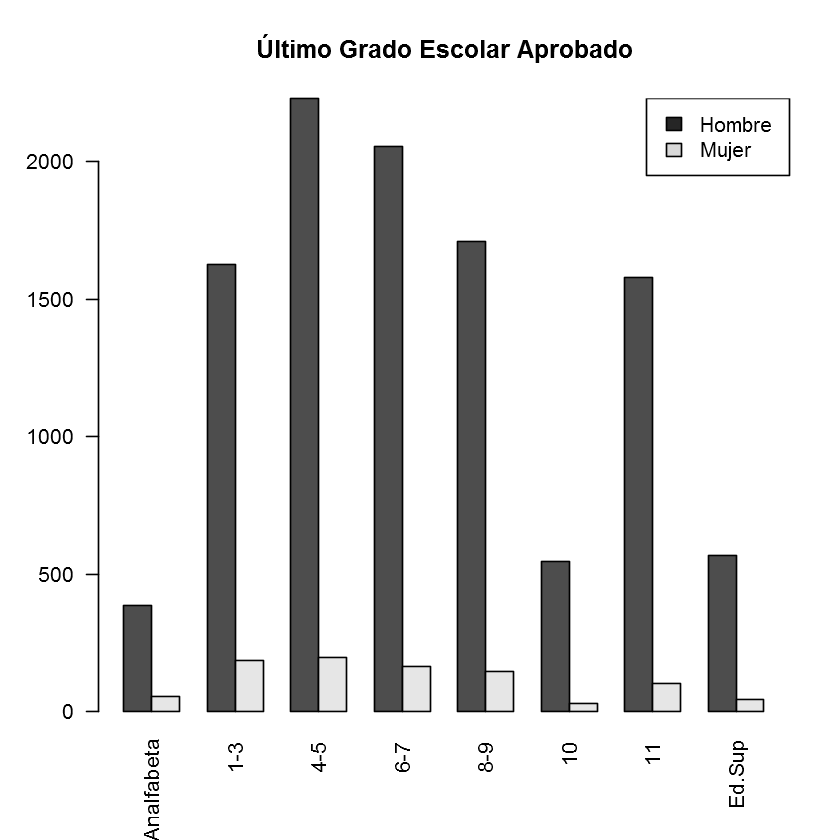

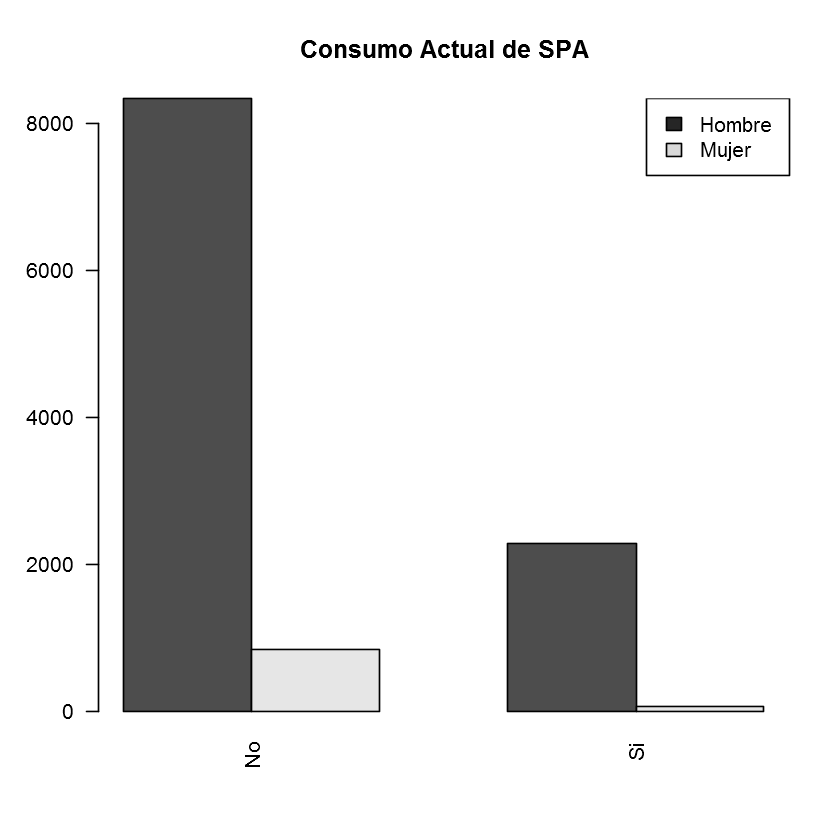

In [15]:
prueba_x=NULL
for(i in 23: length(colnames(chisq_test))){
    varname=colnames(chisq_test)[i]
    var=chisq_test[,i]
    data_prop=table(var,SEXO)
    
    print(varname)
    print(data_prop)
    
    barplot(t(data_prop), main=chisq_test_pltitl[i], beside=T,las=2)
    legend("topright", legend = c("Hombre", "Mujer"), fill = c("gray15", "gray85"))
    #jpeg(filename=paste(varname,"-Sexo.jpg"),width = 600, height = 600,quality = 95)
    #plot(SEXO,factor(var),xlab="Sexo", ylab=varname, main=paste(varname,"- Sexo"))
    #dev.off()
    
    #test_var_sex=prop.test(data_prop)
    #valor_x=round(test_var_sex$statistic,2)
    #valor_p=round(test_var_sex$p.value,2)
    #decis=NULL
    #if (valor_p<0.05){decis="Si existen diferencias"}else{decis="No existen diferencias"}
    #prueba_x=rbind(prueba_x,c(varname,valor_x,valor_p,decis))
    #colnames(prueba_x)=c("Variable", "Valor_chi", "Valor_p", "Decisión")
}
#write.csv2(prueba_x, file="resultados prueba chi.csv")